In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv('veganfood.csv')
data.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
data.head()

,Gender,Age,Level of Education,Frequency Grocery Shopping,Frequency Cooking,Type of Diet,Frequency Meat Consumption,"If you consume meat, Have you considered reducing your meat consumption?","If you consume meat, are you actively trying to reduce your meat consumption?",I know people around me who are flexivegetarian/ vegetarian/ vegan,Are you concerned about climate change?,Meat consumption has a negative impact on climate change,"If you consume meat, do you try to eat meat with lower environmental impact? (e.g. eating chicken instead of cow).",Are you concerned about your eating habits and their impact on your health?,Meat consumption has a negative impact on your health,Are you concerned about animal welfare?,Meat is a fundamental part of a meal,"I enjoy eating meat (taste, texture)",It is hard to find meat free options in restaurants in Spain.,I find more difficult cooking without meat (lack of options).,Cooking without meat is more expensive,Cooking without meat is more time consuming,"Not eating meat can cause you some nutritional deficiencies (e.g: lack of protein, iron problems, lack of vitamin B12)","Existen limitaciones sociales cuando alguien no quiere comer carne (estereotipos, connotaciones negativas)// There are social constraints when someone does not want to eat meat (stereotypes, negative connotations)",motivation_1_Animals,motivation_1_Health,motivation_1_Sustainability,motivation_2_Animals,motivation_2_Health,motivation_2_Sustainability,barrera_1_Enjoyment,barrera_1_Nutrients,barrera_1_Social,barrera_2_Enjoyment,barrera_2_Nutrients,barrera_2_Social
0,1,2,1,1,1,2,2,1.0,2.0,2,1,1,1.0,1,2,3,5,5,3,5,5,5,5,4,0,1,0,0,0,1,1,0,0,0,0,1
1,1,2,1,1,1,2,2,1.0,3.0,3,1,1,2.0,1,2,3,4,3,4,3,5,3,4,2,0,1,0,0,0,1,0,0,1,0,1,0
2,1,2,1,1,1,3,1,1.0,1.0,2,1,1,1.0,1,2,2,5,5,2,3,3,2,4,2,0,0,1,0,1,0,0,0,1,0,1,0
3,0,3,3,1,1,2,2,2.0,3.0,1,2,2,4.0,4,3,3,5,2,5,5,5,4,5,2,0,0,1,0,1,0,1,0,0,0,1,0
4,1,3,1,1,1,1,4,2.0,3.0,2,2,2,3.0,1,3,4,3,2,4,4,5,2,2,5,0,1,0,1,0,0,1,0,0,0,1,0


In [5]:
data.columns

Index(['Gender', 'Age', 'Level of Education', 'Frequency Grocery Shopping',
       'Frequency Cooking', 'Type of Diet', 'Frequency Meat Consumption',
       'If you consume meat, Have you considered reducing your meat consumption?',
       'If you consume meat, are you actively trying to reduce your meat consumption?',
       'I know people around me who are flexivegetarian/ vegetarian/ vegan                           ',
       'Are you concerned about climate change?',
       'Meat consumption has a negative impact on climate change',
       'If you consume meat, do you try to eat meat with lower environmental impact? (e.g. eating chicken instead of cow).',
       'Are you concerned about your eating habits and their impact on your health?',
       'Meat consumption has a negative impact on your health',
       'Are you concerned about animal welfare?',
       'Meat is a fundamental part of a meal',
       'I enjoy eating meat (taste, texture)',
       'It is hard to find meat free op

In [6]:
#from sklearn.decomposition import FactorAnalysis

# Load your data into a pandas DataFrame
#data = pd.read_csv('veganfood.csv')

# Select the columns with your four questions
#questions = data[['If you consume meat, Have you considered reducing your meat consumption?', 'If you consume meat, are you actively trying to reduce your meat consumption?', 'Are you concerned about animal welfare?', 'Are you concerned about climate change?',
                # 'Frequency Meat Consumption']]

# Fit factor analysis to the data
#fa = FactorAnalysis(n_components=1)
#fa.fit(questions)

# Transform the data using the factor loadings
#data['factor_score'] = fa.transform(questions)

# Standardize the factor scores
#data['factor_score_std'] = (data['factor_score'] - data['factor_score'].mean()) / data['factor_score'].std()

# Categorize the factor scores based on your own thresholds
#data['potential_client'] = pd.cut(data['factor_score_std'], bins=[-float('inf'), -1, 1, float('inf')], labels=['low', 'medium', 'high'])


In [7]:
#FULL FA
df=data

In [8]:
df = (df-df.mean())/df.std()

In [9]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_model = calculate_kmo(df)
print(kmo_model)#OUTPUT
kmom=pd.Series(kmo_model)

(array([0.80306891, 0.40373256, 0.45275188, 0.60738335, 0.52264789,
       0.81878512, 0.8134443 , 0.8068748 , 0.81692318, 0.54958511,
       0.72605834, 0.81408937, 0.89236161, 0.74680496, 0.76327775,
       0.48319048, 0.79300905, 0.74926664, 0.61168732, 0.69021085,
       0.41955898, 0.38792691, 0.7134513 , 0.56218208, 0.46997298,
       0.46328023, 0.42645994, 0.43685009, 0.4074306 , 0.44180261,
       0.61630413, 0.53127499, 0.47073648, 0.51774324, 0.62577439,
       0.49679537]), 0.632677574635555)


C:\Users\User\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [10]:
kmom.apply(lambda a: a<0.5).sum()

array([False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False,  True, False, False,  True])

In [11]:
# Get a list of variables with KMO < 0.5
low_kmo_vars = kmom.apply(lambda a: a<0.5).sum()

dfsin = df.loc[:, ~low_kmo_vars]



In [12]:
kmo_model = calculate_kmo(dfsin)
print(kmo_model)#OUTPUT
kmom=pd.Series(kmo_model)

(array([0.85844514, 0.62124267, 0.55426802, 0.85700375, 0.83217725,
       0.84631584, 0.84075948, 0.63705925, 0.85640902, 0.88638546,
       0.89727978, 0.78316001, 0.90965852, 0.86346884, 0.82354569,
       0.61078801, 0.66210815, 0.72838623, 0.61057453, 0.8407865 ,
       0.72539405, 0.62859589, 0.74255725]), 0.799096167507734)


In [13]:
from factor_analyzer.factor_analyzer import FactorAnalyzer 
fa = FactorAnalyzer(rotation='varimax',n_factors=5)
fa.fit(dfsin)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev>1

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [14]:
total_sum = sum(ev)
variance_explained = [(i / total_sum) * 100 for i in ev]

In [15]:
variance_explained

[28.257706085658864,
 12.957948598173399,
 7.6605184823682375,
 7.079835065194487,
 4.773224906481303,
 4.512804011325135,
 4.383852212902594,
 3.580938602917004,
 3.461040738767928,
 3.2820310111088213,
 2.730556142830356,
 2.3492850125027784,
 2.287708336169841,
 2.1450038446979116,
 1.9278095115620504,
 1.6744792685816676,
 1.43418290297197,
 1.3051823572470642,
 1.263667799073714,
 0.9374736908094359,
 0.8207264464565658,
 0.6720769887406242,
 0.5019479834582453]

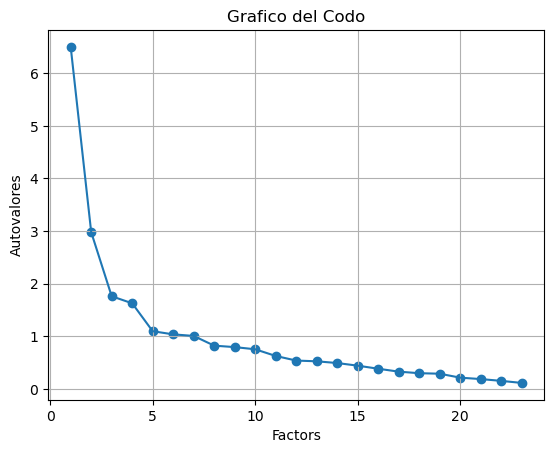

In [16]:
plt.scatter(range(1,dfsin.shape[1]+1), ev)
plt.plot(range(1,dfsin.shape[1]+1), ev)
plt.title("Grafico del Codo")
plt.xlabel("Factors")
plt.ylabel("Autovalores")
plt.grid()
plt.show()

In [17]:
load=pd.DataFrame(fa.loadings_, columns=["Factor1", "Factor2", "Factor3", "Factor4", "Factor5"], index=[dfsin.columns])
load

,Factor1,Factor2,Factor3,Factor4,Factor5
Gender,-0.373366,-0.180868,-0.069907,-0.113954,-0.119647
Frequency Grocery Shopping,0.073720,0.034571,0.653299,0.037981,0.072733
Frequency Cooking,0.067827,0.048348,0.839090,-0.155947,0.025818
Type of Diet,-0.690318,-0.358269,-0.063727,0.011151,0.015549
Frequency Meat Consumption,0.607172,0.268133,0.132910,0.057266,0.087854
"If you consume meat, Have you considered reducing your meat consumption?",0.647291,0.075626,0.146305,0.359662,0.423773
"If you consume meat, are you actively trying to reduce your meat consumption?",0.688743,0.108241,0.248210,0.298967,0.482572
I know people around me who are flexivegetarian/ vegetarian/ vegan,0.212382,-0.109905,0.265126,0.081180,0.158190
Are you concerned about climate change?,0.172928,0.420417,0.201570,0.277396,0.214549
Meat consumption has a negative impact on climate change,0.508975,0.233049,0.242486,0.423299,0.028123


In [18]:
factor_scores = fa.transform(dfsin)
data['factor_score'] = factor_scores[:, 0]  # Extract the scores for the first factor
data['factor_score_std'] = (data['factor_score'] - data['factor_score'].mean()) / data['factor_score'].std()
data['meat_interested'] = pd.cut(data['factor_score_std'], bins=[-float('inf'), -0.8, 0.8, float('inf')], labels=['low', 'medium', 'high'])


In [19]:
data["meat_interested"].value_counts()

medium    64
high      29
low       28
Name: meat_interested, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='meat_interested', ylabel='count'>

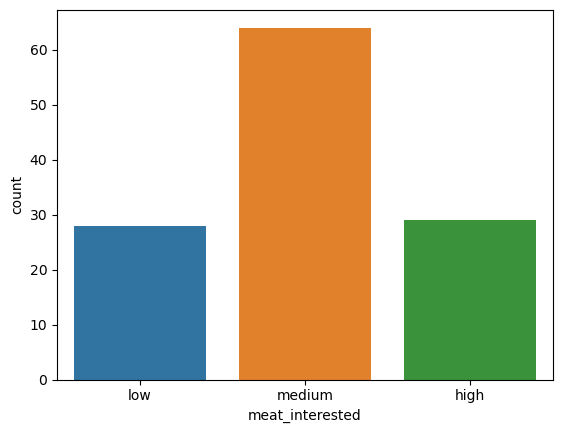

In [22]:
sns.countplot(data["meat_interested"])

In [25]:
data.head()

,Gender,Age,Level of Education,Frequency Grocery Shopping,Frequency Cooking,Type of Diet,Frequency Meat Consumption,"If you consume meat, Have you considered reducing your meat consumption?","If you consume meat, are you actively trying to reduce your meat consumption?",I know people around me who are flexivegetarian/ vegetarian/ vegan,Are you concerned about climate change?,Meat consumption has a negative impact on climate change,"If you consume meat, do you try to eat meat with lower environmental impact? (e.g. eating chicken instead of cow).",Are you concerned about your eating habits and their impact on your health?,Meat consumption has a negative impact on your health,Are you concerned about animal welfare?,Meat is a fundamental part of a meal,"I enjoy eating meat (taste, texture)",It is hard to find meat free options in restaurants in Spain.,I find more difficult cooking without meat (lack of options).,Cooking without meat is more expensive,Cooking without meat is more time consuming,"Not eating meat can cause you some nutritional deficiencies (e.g: lack of protein, iron problems, lack of vitamin B12)","Existen limitaciones sociales cuando alguien no quiere comer carne (estereotipos, connotaciones negativas)// There are social constraints when someone does not want to eat meat (stereotypes, negative connotations)",motivation_1_Animals,motivation_1_Health,motivation_1_Sustainability,motivation_2_Animals,motivation_2_Health,motivation_2_Sustainability,barrera_1_Enjoyment,barrera_1_Nutrients,barrera_1_Social,barrera_2_Enjoyment,barrera_2_Nutrients,barrera_2_Social,factor_score,factor_score_std,meat_interested
0,1,2,1,1,1,2,2,1.0,2.0,2,1,1,1.0,1,2,3,5,5,3,5,5,5,5,4,0,1,0,0,0,1,1,0,0,0,0,1,-1.741308,-1.852372,low
1,1,2,1,1,1,2,2,1.0,3.0,3,1,1,2.0,1,2,3,4,3,4,3,5,3,4,2,0,1,0,0,0,1,0,0,1,0,1,0,-0.871635,-0.927229,low
2,1,2,1,1,1,3,1,1.0,1.0,2,1,1,1.0,1,2,2,5,5,2,3,3,2,4,2,0,0,1,0,1,0,0,0,1,0,1,0,-1.862219,-1.980994,low
3,0,3,3,1,1,2,2,2.0,3.0,1,2,2,4.0,4,3,3,5,2,5,5,5,4,5,2,0,0,1,0,1,0,1,0,0,0,1,0,-1.308171,-1.391609,low
4,1,3,1,1,1,1,4,2.0,3.0,2,2,2,3.0,1,3,4,3,2,4,4,5,2,2,5,0,1,0,1,0,0,1,0,0,0,1,0,0.068474,0.072841,medium


In [26]:
data.drop(['factor_score', 'factor_score_std'], axis=1, inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 37 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                       Non-Null Count  Dtype   
---  ------                                                                                                                                                                                                                                                                                                                                                                                                       --------------  -----   
 0   Gender                              

In [28]:
data['meat_interested'] = data['meat_interested'].map({"high":3, "medium":2, "low":1})

In [29]:
data['meat_interested'].value_counts()

2    64
3    29
1    28
Name: meat_interested, dtype: int64

In [30]:
data['meat_interested'] = data['meat_interested'].astype(int)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 37 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                                                                                       --------------  -----  
 0   Gender                                

In [25]:
X=data.drop(['Type of Diet', 'meat_interested'], axis=1)
y=data['Type of Diet']

In [324]:
#SECOND METHOD (cuesta mas)
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

#g_boost = GradientBoostingRegressor()
#svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)


# create a recursive feature elimination object with cross-validation
rfe = RFE(estimator=rf_model, step=1)

In [325]:
# fit the RFE object to the data
rfe.fit(X, y)

# print the selected feature names
print("Selected Features:", X.columns[rfe.support_])

Selected Features: Index(['Gender', 'Frequency Grocery Shopping', 'Frequency Cooking',
       'Frequency Meat Consumption',
       'If you consume meat, Have you considered reducing your meat consumption?',
       'If you consume meat, are you actively trying to reduce your meat consumption?',
       'I know people around me who are flexivegetarian/ vegetarian/ vegan                           ',
       'Meat consumption has a negative impact on climate change',
       'Meat consumption has a negative impact on your health',
       'Are you concerned about animal welfare?',
       'Meat is a fundamental part of a meal',
       'I enjoy eating meat (taste, texture)',
       'It is hard to find meat free options in restaurants in Spain.                  ',
       'I find more difficult cooking without meat (lack of options).',
       'Cooking without meat is more time consuming',
       'Existen limitaciones sociales cuando alguien no quiere comer carne (estereotipos, connotaciones negati

In [26]:
X=data[['Gender', 'Frequency Grocery Shopping', 'Frequency Cooking',
       'Frequency Meat Consumption',
       'If you consume meat, Have you considered reducing your meat consumption?',
       'If you consume meat, are you actively trying to reduce your meat consumption?',
       'I know people around me who are flexivegetarian/ vegetarian/ vegan                           ',
       'Meat consumption has a negative impact on climate change',
       'Meat consumption has a negative impact on your health',
       'Are you concerned about animal welfare?',
       'Meat is a fundamental part of a meal',
       'I enjoy eating meat (taste, texture)',
       'It is hard to find meat free options in restaurants in Spain.                  ',
       'I find more difficult cooking without meat (lack of options).',
       'Cooking without meat is more time consuming',
       'Existen limitaciones sociales cuando alguien no quiere comer carne (estereotipos, connotaciones negativas)//                                                                                                                                                                                       There are social constraints when someone does not want to eat meat (stereotypes, negative connotations)',
       'barrera_1_Enjoyment']]

In [33]:
#experimento
X=data[["meat_interested"]]
y=data['Type of Diet']

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Train a decision tree model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [36]:
# Make predictions on the test set
y_pred = dtc.predict(X_test)


In [37]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.76


In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.75      0.60      0.67        10
           3       0.00      0.00      0.00         1

    accuracy                           0.76        25
   macro avg       0.50      0.51      0.50        25
weighted avg       0.73      0.76      0.74        25



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [309]:
print(confusion_matrix(y_test,y_pred))

[[12  2  0]
 [ 3  6  1]
 [ 0  1  0]]


In [32]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['meat_interested'], data['Gender'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared test statistic:", chi2)
print("p-value:", p_value)

Chi-squared test statistic: 24.504348075437072
p-value: 4.774725666525597e-06


In [39]:
contingency_table = pd.crosstab(data['meat_interested'], data['Meat consumption has a negative impact on climate change'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared test statistic:", chi2)
print("p-value:", p_value)

Chi-squared test statistic: 39.09861050653285
p-value: 6.845988182815898e-07


In [ ]:
contingency_table = pd.crosstab(data['meat_interested'], data['Are you concerned about climate change?'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared test statistic:", chi2)
print("p-value:", p_value)

In [ ]:
#El hecho de que una persona tiene interes en el cambio climatico y los animales, no significa que intenta reducir su
#consumo de carne. 

In [ ]:
#MEDIDAS DE ASOCIACION

In [40]:
variables = data[['meat_interested', 'Are you concerned about climate change?', 'Gender']]

associations = np.zeros((3, 3))

for i in range(3):
    for j in range(i+1, 3):
        contingency_table = pd.crosstab(variables.iloc[:, i], variables.iloc[:, j])
        n = contingency_table.sum().sum()
        row_marginals = contingency_table.sum(axis=1).values
        col_marginals = contingency_table.sum(axis=0).values
        expected_frequencies = np.outer(row_marginals, col_marginals) / n
        lambda_statistic = np.sum(contingency_table.values * np.log(contingency_table.values / expected_frequencies))
        associations[i, j] = np.sqrt(lambda_statistic / n)
        associations[j, i] = associations[i, j]

np.fill_diagonal(associations, 1)

association_matrix = pd.DataFrame(associations, columns=['meat_interested', 'Are you concerned about climate change?', 'Gender'], index=['meat_interested', 'Are you concerned about climate change?', 'Gender'])

<AxesSubplot:>

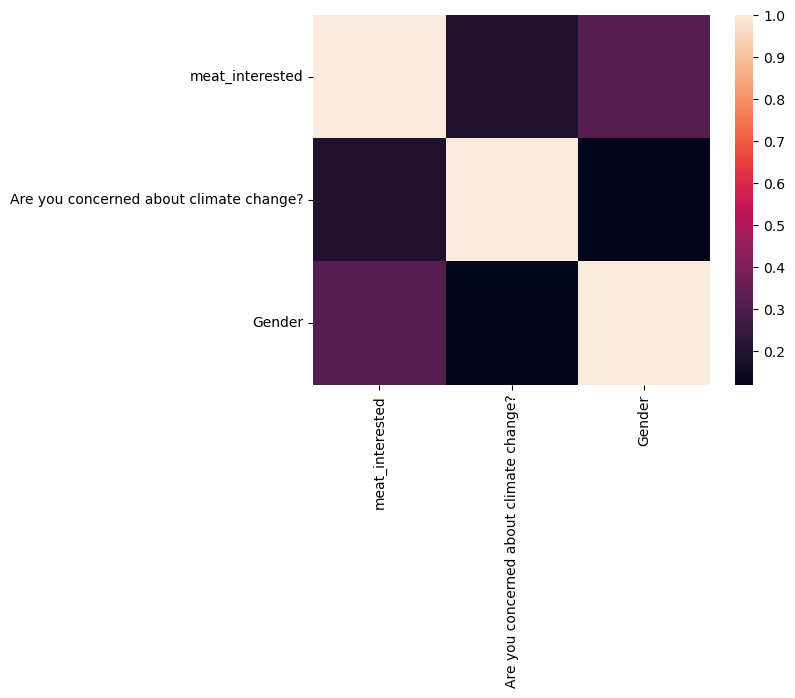

In [41]:
sns.heatmap(association_matrix)

In [27]:
data.columns

Index(['Gender', 'Age', 'Level of Education', 'Frequency Grocery Shopping',
       'Frequency Cooking', 'Type of Diet', 'Frequency Meat Consumption',
       'If you consume meat, Have you considered reducing your meat consumption?',
       'If you consume meat, are you actively trying to reduce your meat consumption?',
       'I know people around me who are flexivegetarian/ vegetarian/ vegan                           ',
       'Are you concerned about climate change?',
       'Meat consumption has a negative impact on climate change',
       'If you consume meat, do you try to eat meat with lower environmental impact? (e.g. eating chicken instead of cow).',
       'Are you concerned about your eating habits and their impact on your health?',
       'Meat consumption has a negative impact on your health',
       'Are you concerned about animal welfare?',
       'Meat is a fundamental part of a meal',
       'I enjoy eating meat (taste, texture)',
       'It is hard to find meat free op

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


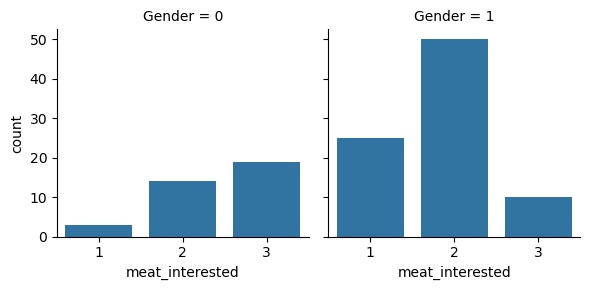

In [48]:
g = sns.FacetGrid(data, col= 'Gender')
g.map(sns.countplot, 'meat_interested')